# Gold Price Prediction

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

C:\Users\dhruvin\AppData\Local\Temp\ipykernel_2192\2747574327.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Data Collection and processing

In [2]:
#loading csv file into pandas dataframe
gold_data = pd.read_csv("gld_price_data.csv")

In [3]:
#Print first five data of the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#Printing last five data of the dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#number of raws and columns
gold_data.shape

(2290, 6)

In [6]:
#Getting info about dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#Checking missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#Getting statacital measure of data set
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Corelation

In [9]:
tmp_data = gold_data.drop('Date',axis=1)
tmp_data
correlation = tmp_data.corr()

<Axes: >

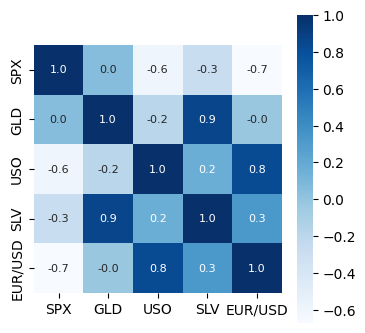

In [10]:
#ploating the heatmap to understand corelation
plt.figure(figsize=(4,4))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [11]:
#Correlatuion value of GLD
print(correlation)
print(correlation['GLD'])

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


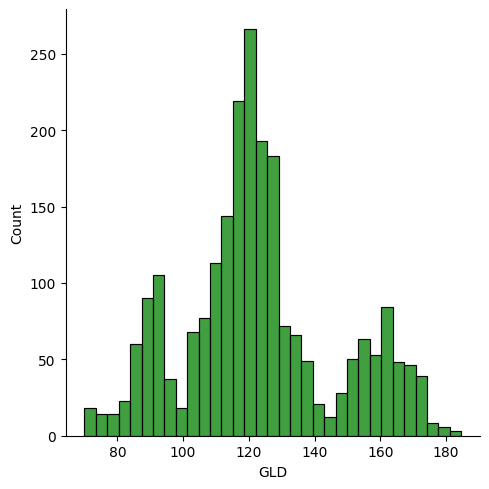

In [13]:
#Checking distribution of GLD price
sns.displot(gold_data['GLD'],color='green')

#### spliting dataset

In [16]:
# seperating feature and target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1832, 4)
(458, 4)
(1832,)
(458,)


#### Model Training: Random Forest Regressor

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
#Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

#### Model Evaluation

In [33]:
#Predicting on test data
test_data_prediction = regressor.predict(X_test)

In [34]:
print(test_data_prediction)

[168.50149904  82.07930007 116.10029994 127.65760072 120.65500116
 154.63599788 150.39679837 126.00730039 117.51519858 125.98960057
 116.69480098 172.36370072 141.43929786 168.13259855 115.29560016
 117.64720038 137.607903   170.2125011  158.73780309 160.08699942
 155.1804005  125.38069992 176.09460065 157.39070346 125.15640056
  93.8827      77.33380002 120.56910026 119.1649997  167.38139999
  87.92120035 125.06320003  91.10730099 117.86710003 121.0820992
 136.10770057 115.36330121 115.13850087 147.34260035 107.38150105
 104.8014028   87.21219791 126.31470037 118.00279988 154.14409915
 119.69719994 108.32180022 108.17529843  93.16130032 127.07749777
  74.53070049 113.74609946 121.52230003 111.35009927 118.91979917
 120.70899937 158.82969996 167.57600111 146.90219677  85.8236985
  94.15770028  86.74649877  90.55260004 118.952001   126.42200067
 127.6659004  169.30970067 122.19699953 117.28529911  98.73930046
 167.93870165 142.86719871 131.92400252 121.27720229 120.70119972
 119.6172007

In [35]:
#R square
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R square error: ",error_score)

R square error:  0.9888069956467774


In [36]:
#Comparing actual value and predicted value in plot
Y_test=list(Y_test)

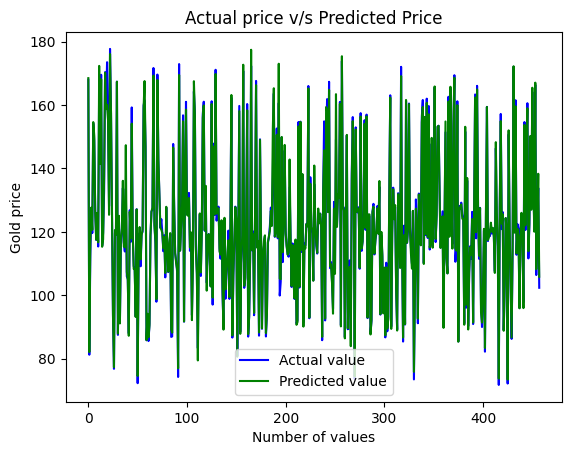

In [38]:
plt.plot(Y_test,color='Blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title("Actual price v/s Predicted Price")
plt.xlabel('Number of values')
plt.ylabel("Gold price")
plt.legend()
plt.show()